In [26]:
import math
def maximum_subarray_bf(nums):
    maxSum = -math.inf
    for i in range(len(nums)):
        tsum = 0
        for j in range(i, len(nums)):
            tsum += nums[j]
            maxSum = max(maxSum, tsum)

    return maxSum

def maximum_subarray_crossing_sum(nums, left, mid, right):
    curr = best_left_sum = best_right_sum = 0
    
    # Iterate from the middle to the beginning.
    for i in range(mid - 1, left - 1, -1):
        curr += nums[i]
        best_left_sum = max(best_left_sum, curr)

    # Reset curr and iterate from the middle to the end.
    curr = 0
    for i in range(mid + 1, right + 1):
        curr += nums[i]
        best_right_sum = max(best_right_sum, curr)

    # The best_combined_sum uses the middle element and
    # the best possible sum from each half.
    best_combined_sum = nums[mid] + best_left_sum + best_right_sum
    return best_combined_sum

def maximum_subarray_dc(nums, l, h):
    if l == h:
        return nums[l]
    
    m = (l + h) // 2
    return max(maximum_subarray_dc(nums, l, m), maximum_subarray_dc(nums, m + 1, h), maximum_subarray_crossing_sum(nums, l, m ,h))





In [45]:
res = []
lengths, bf, dc = [], [], []
import time
for i in range(10, 70):
    array = []
    import random
    random.seed(random.randint(-1000, 1000) % 10)
    for j in range(0,i):
        n = random.randint(-100,100)
        array.append(n)
        import timeit
        start_bf = time.time()
        maximum_subarray_bf(array)
        end_bf = time.time()
#         print(end - start)
        start_dc = time.time()
        maximum_subarray_dc(array, 0, len(array) - 1)
        end_dc = time.time()
        lengths.append(len(array))
        bf.append(end_bf - start_bf)
        dc.append(end_dc - start_dc)
        if bf[-1] < dc[-1]: 
            msg = "BF took less time than DC"
        else:
            msg = "DC took less time than BF"
    print("For array of len",len(array), "Brute force took", end_bf - start_bf, "while D&C took" , end_dc - start_dc, "Result:", msg )

For array of len 10 Brute force took 3.0279159545898438e-05 while D&C took 3.2901763916015625e-05 Result: BF took less time than DC
For array of len 11 Brute force took 3.409385681152344e-05 while D&C took 3.790855407714844e-05 Result: BF took less time than DC
For array of len 12 Brute force took 4.1961669921875e-05 while D&C took 4.100799560546875e-05 Result: DC took less time than BF
For array of len 13 Brute force took 4.982948303222656e-05 while D&C took 5.626678466796875e-05 Result: BF took less time than DC
For array of len 14 Brute force took 5.507469177246094e-05 while D&C took 5.0067901611328125e-05 Result: DC took less time than BF
For array of len 15 Brute force took 5.984306335449219e-05 while D&C took 5.793571472167969e-05 Result: DC took less time than BF
For array of len 16 Brute force took 6.866455078125e-05 while D&C took 5.817413330078125e-05 Result: DC took less time than BF
For array of len 17 Brute force took 7.605552673339844e-05 while D&C took 8.916854858398438e

Text(0, 0.5, 'Scale (Bananas)')

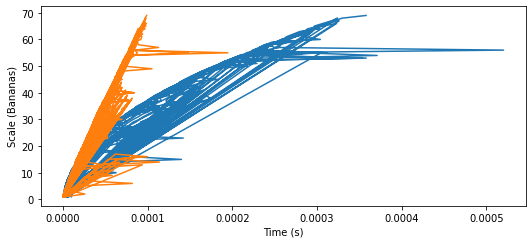

In [42]:
from matplotlib import pyplot as plt
plt.plot(bf, lengths)
plt.plot(dc,lengths)
plt.xlabel("Time (s)")
plt.ylabel("Scale (Bananas)")


In [24]:
bf

[8.821487426757812e-06,
 4.0531158447265625e-06,
 5.0067901611328125e-06,
 5.7220458984375e-06,
 6.9141387939453125e-06,
 9.059906005859375e-06,
 1.1205673217773438e-05,
 1.3113021850585938e-05,
 1.6927719116210938e-05,
 1.9788742065429688e-05,
 6.198883056640625e-06,
 4.0531158447265625e-06,
 4.76837158203125e-06,
 5.9604644775390625e-06,
 7.152557373046875e-06,
 8.821487426757812e-06,
 1.1205673217773438e-05,
 1.2874603271484375e-05,
 1.5735626220703125e-05,
 1.9788742065429688e-05,
 2.2172927856445312e-05,
 4.291534423828125e-06,
 3.0994415283203125e-06,
 4.0531158447265625e-06,
 6.198883056640625e-06,
 6.9141387939453125e-06,
 8.821487426757812e-06,
 1.0967254638671875e-05,
 1.4066696166992188e-05,
 1.5974044799804688e-05,
 1.8835067749023438e-05,
 2.288818359375e-05,
 2.574920654296875e-05,
 3.0994415283203125e-06,
 2.1457672119140625e-06,
 4.291534423828125e-06,
 4.76837158203125e-06,
 6.9141387939453125e-06,
 9.059906005859375e-06,
 1.0967254638671875e-05,
 1.4066696166992188e-0